# Data Source
The original data file "modcloth_final_data.json" was retrieved from https://www.kaggle.com/datasets/rmisra/clothing-fit-dataset-for-size-recommendation

## Data Manipulation
10,000 samples were used from the original file.
These 10,000 samples were then separated by a comma and updated to be apart of a Json List.
The "DataScubberScript.Py" code then scrubs the data further so that only data with the result of "fit" is used. Then the code further reduces the data by only including data that has valid entries for waist, hips, bra size, and size. This data is then put into the "Data/modcloth_final_data_medium" csv file to be feed to the machine learning algorithm.

Histogram of the data


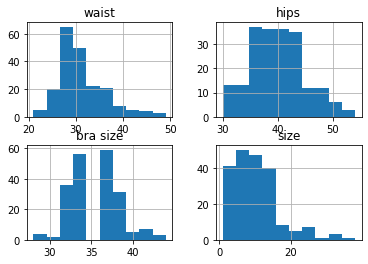

Scatter plot of the data


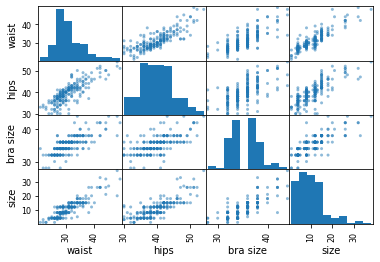

Running 3 random simulations of the Model...
...

Running simulation 1 with a 30.0% random test set.
The simulation predicted sizes with 40.98% accuracy.
Confusion Matrix of the Predictions


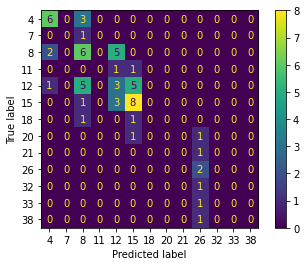

...

Running simulation 2 with a 30.0% random test set.
The simulation predicted sizes with 36.07% accuracy.
Confusion Matrix of the Predictions


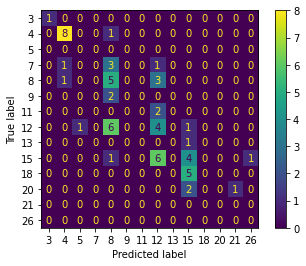

...

Running simulation 3 with a 30.0% random test set.
The simulation predicted sizes with 52.46% accuracy.
Confusion Matrix of the Predictions


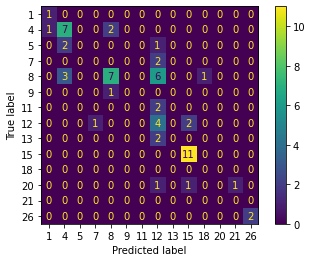

The Average Accuracy for the model over 3 simulations is 43.17%

The min:36.07
The max:52.46

Want to see the recommended size for a StyleBear clothing item?
Enter a waist size in inches: 30
Enter a hip size in inches: 38
Enter a bra size in inches: 34
The recommended clothing size to fit a person with 30 inch waist, 38 inch hips and 34 inch bra size is [8]



In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
from sklearn import linear_model, metrics, model_selection
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np

csvFilePath = r"Data/modcloth_final_data_medium.csv"

df = pd.read_csv(csvFilePath) 

# Showing distribution of data
print("Histogram of the data")
df.hist()
pyplot.show()

print("Scatter plot of the data")
scatter_matrix(df)
pyplot.show()

# make model
log_model = linear_model.LogisticRegression(max_iter=70000)
y = df.values[:, 3]
y=y.astype('int')
x = df.values[:, 0:3]
x=x.astype('int')
averagePercentage = 0
minPercentage = 100
maxPercentage = 0
simulationCount = 3
print("Running " + str(simulationCount) + " random simulations of the Model...")
for i in range(simulationCount):
    testSetSize = 0.30
    print("...\n")
    print("Running simulation " + str(i + 1) + " with a " + str(testSetSize * 100) + "% random test set.")
    X_train, X_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = testSetSize)

    # train model
    log_model.fit(X_train, y_train)

    # predict test set
    y_pred_log = log_model.predict(X_test)
    modelAccuracy = round(log_model.score(X_test, y_test) * 100, 2)
    
    print("The simulation predicted sizes with " + str(modelAccuracy) + "% accuracy.")
    print("Confusion Matrix of the Predictions")
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred_log)
    pyplot.show()
    averagePercentage = averagePercentage + modelAccuracy
    if modelAccuracy < minPercentage:
        minPercentage = modelAccuracy
    if modelAccuracy > maxPercentage:
        maxPercentage = modelAccuracy
print("The Average Accuracy for the model over " + str(simulationCount) + " simulations is " + str(round(averagePercentage/simulationCount, 2)) + "%\n")
print("The min:" + str(minPercentage))
print("The max:" + str(maxPercentage) + "\n")

anotherRecommendation = "Y"

while (anotherRecommendation == "Y"):
    print("Want to see the recommended size for a StyleBear clothing item?")
    waistSize = int(input("Enter a waist size in inches: "))
    hipSize = int(input("Enter a hip size in inches: "))
    braSize = int(input("Enter a bra size in inches: "))
    inputArray = np.array([[waistSize, hipSize, braSize]])
    print("The recommended clothing size to fit a person with " + str(waistSize) + " inch waist, " + str(hipSize) + " inch hips and " + str(braSize) + " inch bra size is " + str(log_model.predict(inputArray)) + "\n")
    anotherRecommendation = input("Would you like to see the recommendation for different measurements? \nPress (Y + [Enter]) for Yes, Any other key for No: ")
    print()